# First Name: 
# Last Name: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import matplotlib.pyplot as plt

In [2]:
nesarc = pd.read_csv('nesarc.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
nesarc['S3AQ3B1'] = pd.to_numeric(nesarc['S3AQ3B1']) #convert variable to numeric
nesarc['S3AQ3C1'] = pd.to_numeric(nesarc['S3AQ3C1']) #convert variable to numeric
nesarc['CHECK321'] = pd.to_numeric(nesarc['CHECK321']) #convert variable to numeric

In [4]:
sub1=nesarc[(nesarc['AGE']>=18) & (nesarc['AGE']<=25) & (nesarc['CHECK321']==1)]
sub2=sub1.copy()

In [5]:
#SETTING MISSING DATA
sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, np.nan)
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, np.nan)

In [6]:
recode2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode2)
sub2['USFREQMO']= pd.to_numeric(sub2['USFREQMO'])

In [7]:
# Creating a secondary variable multiplying the days smoked/month and the number of cig/per day
sub2['NUMCIGMO_EST']=sub2['USFREQMO'] * sub2['S3AQ3C1']
sub2['NUMCIGMO_EST']= pd.to_numeric(sub2['NUMCIGMO_EST'])

In [8]:
ct1 = sub2.groupby('NUMCIGMO_EST').size()
print (ct1)

NUMCIGMO_EST
1.000000       29
2.000000       14
2.500000       11
3.000000       12
4.000000        2
               ..
1050.000000     1
1200.000000    29
1800.000000     2
2400.000000     1
2940.000000     1
Length: 66, dtype: int64


# Categorical -> Quantitative - ANOVA

In [9]:
sub2['MAJORDEPLIFE'] = sub2['MAJORDEPLIFE'].astype('category') 

Text(0, 0.5, 'NUMCIGMO_EST')

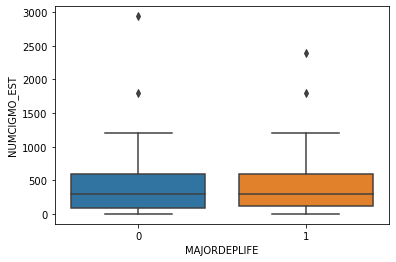

In [10]:
%matplotlib inline
sns.boxplot(x='MAJORDEPLIFE', y='NUMCIGMO_EST', data=sub2)
plt.xlabel('MAJORDEPLIFE')
plt.ylabel('NUMCIGMO_EST')

In [11]:
model1 = smf.ols(formula='NUMCIGMO_EST ~ C(MAJORDEPLIFE)', data=sub2).fit()
print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.550
Date:                Tue, 30 Mar 2021   Prob (F-statistic):             0.0597
Time:                        09:39:57   Log-Likelihood:                -11934.
No. Observations:                1697   AIC:                         2.387e+04
Df Residuals:                    1695   BIC:                         2.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              312.8380 

In [12]:
sub3 = sub2[['NUMCIGMO_EST', 'MAJORDEPLIFE']].dropna()

In [13]:
print ('means for numcigmo_est by major depression status')
m1= sub3.groupby('MAJORDEPLIFE').mean()
print (m1)

means for numcigmo_est by major depression status
              NUMCIGMO_EST
MAJORDEPLIFE              
0               312.837989
1               341.375000


In [14]:
print ('standard deviations for numcigmo_est by major depression status')
sd1 = sub3.groupby('MAJORDEPLIFE').std()
print (sd1)

standard deviations for numcigmo_est by major depression status
              NUMCIGMO_EST
MAJORDEPLIFE              
0               269.002344
1               288.495118


# Categorical (>2) -> Quantitative - ANOVA

In [15]:
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category') 
sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

Text(0, 0.5, 'NUMCIGMO_EST')

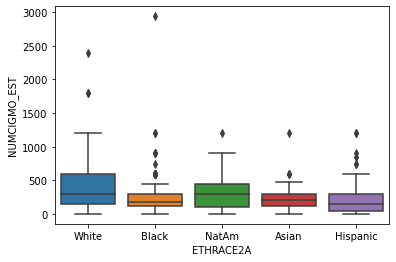

In [16]:
%matplotlib inline
sns.boxplot(x='ETHRACE2A', y='NUMCIGMO_EST', data=sub2)
plt.xlabel('ETHRACE2A')
plt.ylabel('NUMCIGMO_EST')

In [17]:
sub4 = sub2[['NUMCIGMO_EST', 'ETHRACE2A']].dropna()

In [18]:
model2 = smf.ols(formula='NUMCIGMO_EST ~ C(ETHRACE2A)', data=sub4).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     24.40
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.18e-19
Time:                        09:39:58   Log-Likelihood:                -11888.
No. Observations:                1697   AIC:                         2.379e+04
Df Residuals:                    1692   BIC:                         2.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [19]:
print ('means for numcigmo_est by ethnicity')
m2= sub4.groupby('ETHRACE2A').mean()
print (m2)

means for numcigmo_est by ethnicity
           NUMCIGMO_EST
ETHRACE2A              
White        368.786528
Black        259.273810
NatAm        310.988095
Asian        244.258621
Hispanic     219.758258


In [20]:
print ('standard deviations for numcigmo_est by ethnicity')
sd2 = sub4.groupby('ETHRACE2A').std()
print (sd2)

standard deviations for numcigmo_est by ethnicity
           NUMCIGMO_EST
ETHRACE2A              
White        281.430730
Black        278.677392
NatAm        260.116964
Asian        195.076441
Hispanic     220.859365


In [21]:
mc1 = multi.MultiComparison(sub4['NUMCIGMO_EST'], sub4['ETHRACE2A'])
res1 = mc1.tukeyhsd()
print(res1.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj    lower    upper   reject
-----------------------------------------------------------
   Asian    Black  15.0152    0.9  -93.2026  123.233  False
   Asian Hispanic -24.5004    0.9 -128.3027   79.302  False
   Asian    NatAm  66.7295 0.7058  -81.0848 214.5437  False
   Asian    White 124.5279 0.0051   26.1329 222.9229   True
   Black Hispanic -39.5156 0.4492 -103.8025  24.7714  False
   Black    NatAm  51.7143 0.7555  -71.6021 175.0307  False
   Black    White 109.5127  0.001   54.3814 164.6441   True
Hispanic    NatAm  91.2298 0.2269  -28.2305 210.6902  False
Hispanic    White 149.0283  0.001  103.1665   194.89   True
   NatAm    White  57.7984 0.6251  -56.9945 172.5914  False
-----------------------------------------------------------
